# EMAIL SPAM CLASSIFICATION USING MULTIPLE MODELS OF ML 

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings 
warnings.filterwarnings("ignore")

## Importing Data (dataset is from Kaggle)

In [4]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Data related files\emails.csv")
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
df.shape

(5172, 3002)

In [8]:
df.isnull()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [10]:
#WE CAN SEE THAT THE DATA IS CLEAN AND WE CAN PROCEED FOR EDA AND MACHINE LEARNING MODELS

In [11]:
df.duplicated().sum()

0

Spam Emails :  92
Non Spam Emails :  5080
Total Emails :  5172


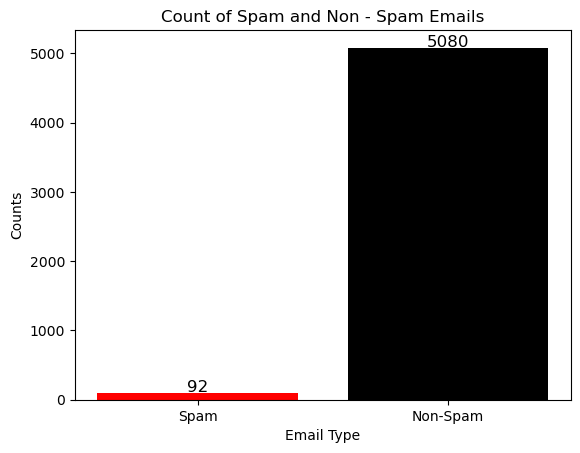

In [12]:
spam_count = sum(df['spam'])
non_spam_count = len(df) - spam_count
total_emails = len(df)

print("Spam Emails : ", spam_count)
print("Non Spam Emails : ", non_spam_count)
print("Total Emails : ",total_emails)

categories = ['Spam', 'Non-Spam']
counts = [spam_count, non_spam_count]

plt.bar(categories, counts, color =['Red', 'Black'])
for i, count in enumerate(counts):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)
plt.xlabel("Email Type")
plt.ylabel("Counts")
plt.title("Count of Spam and Non - Spam Emails")
plt.show()

In [13]:
#spam mails and non spam mails into percentage for pie chart
spam_percent = (spam_count/total_emails)*100
non_spam_percent = (non_spam_count/total_emails)*100
spam_percent, non_spam_percent

(1.7788089713843775, 98.22119102861562)

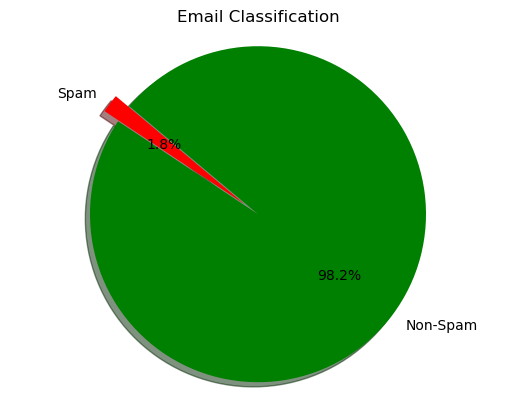

In [14]:
#now creating a pie chart by these percentage values
labels = 'Spam', 'Non-Spam'
sizes = [spam_percent, non_spam_percent]
colors = ['Red', 'Green']
explode = [0.1, 0]
plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis("equal")
plt.title("Email Classification")
plt.show()

In [15]:
X = df.iloc[:,1:3001]
X.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0


In [16]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [17]:
#importing train_test_split from sklearn to split the data into train and test splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 12)

In [18]:
X_train.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4019,7,5,9,6,5,0,60,4,3,14,...,0,0,0,0,0,0,0,0,2,0
3240,2,1,1,1,0,2,9,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2121,15,6,8,5,8,7,98,7,0,14,...,0,0,0,0,0,0,0,0,2,0
665,3,5,85,4,2,0,88,2,43,5,...,0,0,0,0,0,0,0,0,1,0
799,34,13,8,5,15,10,122,24,6,25,...,0,0,0,0,0,0,0,1,1,0


In [19]:
X_test.head()

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
4075,2,1,3,0,1,2,13,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4835,10,7,3,8,3,5,99,0,0,14,...,0,0,0,0,1,0,0,0,6,0
4439,6,5,4,2,0,9,57,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3910,4,5,5,1,3,2,44,0,2,5,...,0,0,0,0,0,0,0,0,0,0
2398,0,1,1,0,4,0,14,0,0,6,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y_test.head()

4075    0
4835    0
4439    0
3910    0
2398    1
Name: Prediction, dtype: int64

In [21]:
y_train.head()

4019    0
3240    1
2121    1
665     0
799     0
Name: Prediction, dtype: int64

In [22]:
#we will do feature scaling now with standard scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [23]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

##  Linear Regression (Model - 1)

In [24]:
#importing Linear Regression

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [25]:
model_1.fit(X_train, y_train)

LinearRegression()

In [26]:
model_1.score(X_test, y_test)

-314.077980110203

In [27]:
a = model_1.score(X_test, y_test)

In [28]:
#as we can see the accuracy of Linear Regression is -314 so we will not be considering this model.

##                                           Logistic Regression (Model - 2)

In [29]:
#importing Logistic Regression from sklearn

from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression()

In [30]:
model_2.fit(X_train, y_train)

LogisticRegression()

In [31]:
model_2.score(X_test, y_test)

0.9719806763285024

In [32]:
y_pred_model_2 = model_2.predict(X_test)
y_pred_model_2

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred_model_2)
cm

array([[694,   5],
       [ 24, 312]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_model_2)

0.9719806763285024

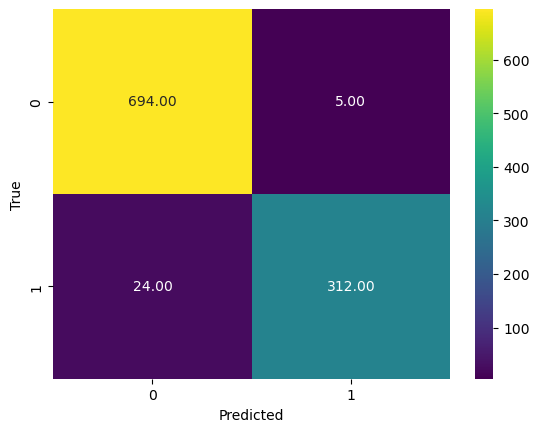

In [35]:
#importing Seaborn Library for confusion matrix graph

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='viridis') #annot displays the text on graph
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred_model_2)
recall = recall_score(y_test, y_pred_model_2)
f1 = f1_score(y_test, y_pred_model_2)

In [37]:
print("The Precision Score is : ", precision)
print("The Recall Score is : ", recall)
print("The F1 Score is : ", f1)

The Precision Score is :  0.9842271293375394
The Recall Score is :  0.9285714285714286
The F1 Score is :  0.9555895865237367


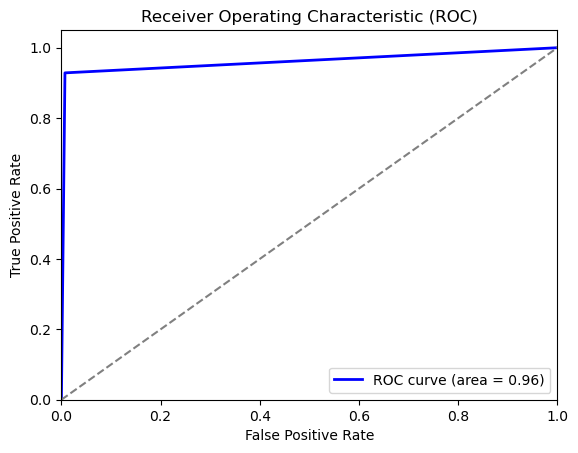

In [38]:
#we are going to create a roc curve for logistic regression 
#fpr = false positive rate which is (false positive/false positive + true negative) = 5/(5+312) = 5/317 = 0.015 (approx)
#tpr = true positive rate which is (true positive/ true positive + false negative) = 694/(694+24) = 694/718 = 0.96(approx)
#threshold is to generate different points on the roc_curve 
#auc is the area under the curve which represents the performance of logistic regression 


from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_model_2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

In [39]:
accuracy_score(y_test, y_pred_model_2)

0.9719806763285024

In [40]:
b = accuracy_score(y_test, y_pred_model_2)

## Decision Tree (Model - 3)

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_3 = DecisionTreeClassifier(random_state = 0)

In [42]:
model_3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
y_pred_model_3 = model_3.predict(X_test)
y_pred_model_3

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [44]:
cm = confusion_matrix(y_test, y_pred_model_3)
cm

array([[681,  18],
       [ 70, 266]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred_model_3)

0.914975845410628

In [46]:
c = accuracy_score(y_test, y_pred_model_3)

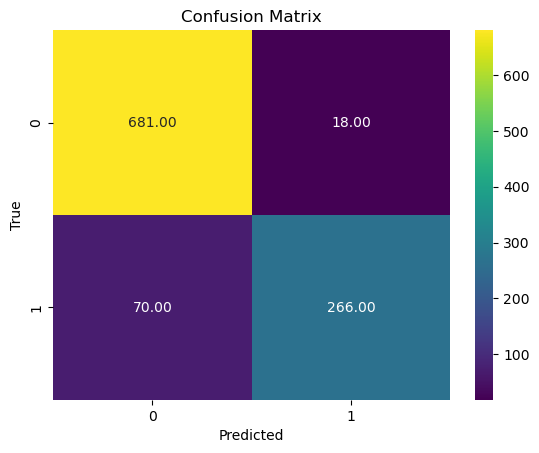

In [47]:
#heatmap for decision Tree

sns.heatmap(cm, annot=True, fmt='.2f', cmap='viridis') 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

## Random Forest (Model - 4)

In [48]:
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [49]:
model_4.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [50]:
y_pred_model_4 = model_4.predict(X_test)
y_pred_model_4

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [51]:
cm = confusion_matrix(y_test, y_pred_model_4)
cm

array([[691,   8],
       [ 74, 262]], dtype=int64)

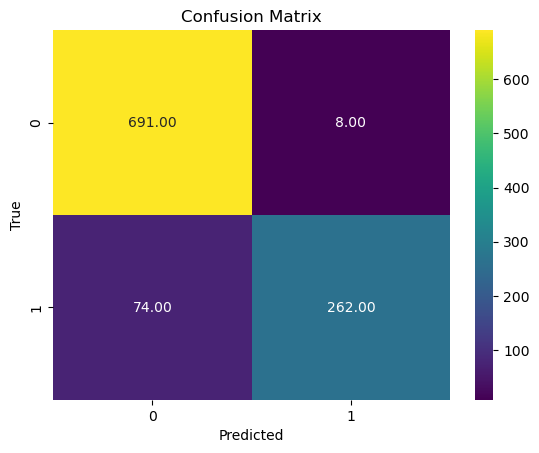

In [52]:
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'viridis')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [53]:
accuracy_score(y_test, y_pred_model_4)

0.9207729468599034

In [54]:
model_4.score(X_test, y_test)

0.9207729468599034

In [55]:
d = accuracy_score(y_test, y_pred_model_4)

## Naive Bayes  (Model - 5)

In [56]:
from sklearn.naive_bayes import GaussianNB
model_5 = GaussianNB()

In [57]:
model_5.fit(X_train, y_train)

GaussianNB()

In [58]:
y_pred_model_5 = model_5.predict(X_test)
y_pred_model_5

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [59]:
cm = confusion_matrix(y_test, y_pred_model_5)
cm

array([[696,   3],
       [177, 159]], dtype=int64)

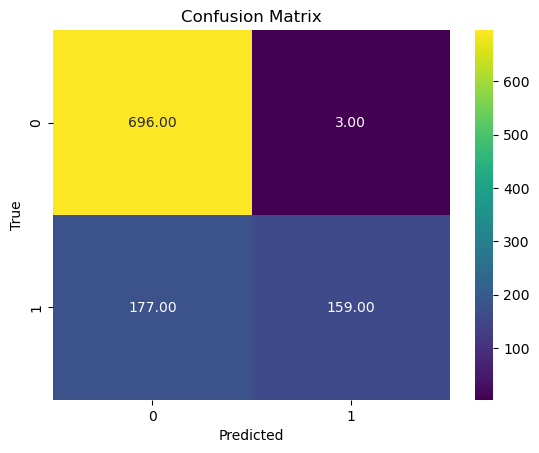

In [60]:
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'viridis')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [61]:
accuracy_score(y_test, y_pred_model_5)

0.8260869565217391

In [62]:
model_5.score(X_test, y_test)

0.8260869565217391

In [63]:
e = accuracy_score(y_test, y_pred_model_5)

## Support Vector Machine (model - 6) 

In [64]:
from sklearn.svm import SVC
model_6 = SVC()

In [65]:
model_6.fit(X_train, y_train)

SVC()

In [66]:
y_pred_model_6 = model_6.predict(X_test)
y_pred_model_6

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
cm = confusion_matrix(y_test, y_pred_model_6)
cm

array([[698,   1],
       [ 79, 257]], dtype=int64)

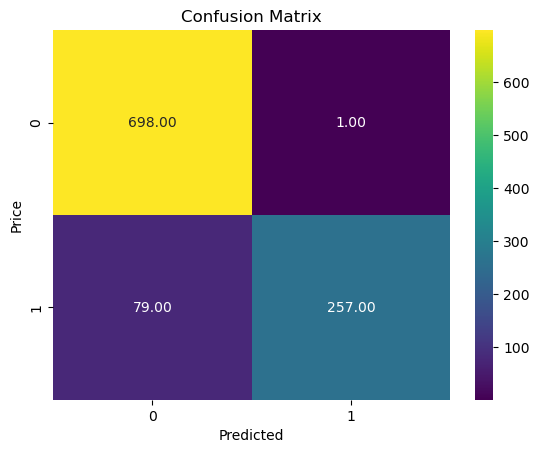

In [68]:
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'viridis')
plt.xlabel("Predicted")
plt.ylabel("Price")
plt.title("Confusion Matrix")
plt.show()

In [69]:
accuracy_score(y_test, y_pred_model_6)

0.9227053140096618

In [70]:
model_6.score(X_test, y_test)

0.9227053140096618

In [71]:
f = accuracy_score(y_test, y_pred_model_6)

## K Nearest Neighbors (KNN Modedl - 7)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model_7 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [73]:
model_7.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
y_pred_model_7 = model_7.predict(X_test)
y_pred_model_7

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [75]:
cm = confusion_matrix(y_test, y_pred_model_7)
cm

array([[586, 113],
       [ 24, 312]], dtype=int64)

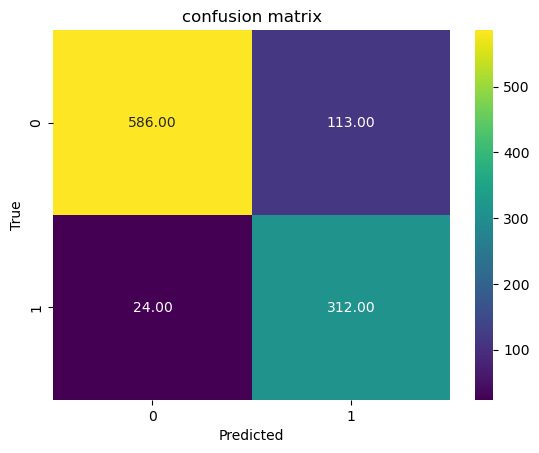

In [76]:
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'viridis')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("confusion matrix")
plt.show()

In [77]:
accuracy_score(y_test, y_pred_model_7)

0.8676328502415459

In [78]:
model_7.score(X_test, y_test)

0.8676328502415459

In [79]:
g = accuracy_score(y_test, y_pred_model_7)

## Now choosing the best algorithm for Email Spam Classification

In [80]:
print("The Accuracy of Linear Regression is : ",a)
print("The Accuracy of Logistic Regression is : ",b)
print("The Accuracy of Decision Tree : ",c)
print("The Accuracy of Random Forest : ",d)
print("The Accuracy of Naive Bayes : ",e)
print("The Accuracy of Support Vector Machine is : ",f)
print("The Accuracy of K-Nearest Neighbors is : ",g)

The Accuracy of Linear Regression is :  -314.077980110203
The Accuracy of Logistic Regression is :  0.9719806763285024
The Accuracy of Decision Tree :  0.914975845410628
The Accuracy of Random Forest :  0.9207729468599034
The Accuracy of Naive Bayes :  0.8260869565217391
The Accuracy of Support Vector Machine is :  0.9227053140096618
The Accuracy of K-Nearest Neighbors is :  0.8676328502415459
